Found 42 temp files


/home/as5023/miniconda3/envs/IRP/lib/python3.12/site-packages/distributed/client.py:3164: UserWarning: Sending large graph of size 554.33 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Files processed successfully
Number of NaNs in Temperatures: 15064028 out of 29062688 (51.83%)

          Longitude      Latitude       Diviner
count  2.906269e+07  2.906269e+07  1.399866e+07
mean   1.799996e+02 -8.188352e+01  1.267444e+02
std    1.034039e+02  3.022930e+00  6.469151e+01
min    1.503432e-02 -9.000000e+01  0.000000e+00
25%    9.000752e+01 -8.401658e+01  7.976000e+01
50%    1.800000e+02 -8.153659e+01  9.344000e+01
75%    2.699925e+02 -7.963361e+01  1.840400e+02
max    3.599850e+02 -7.500000e+01  3.308400e+02


/home/as5023/miniconda3/envs/IRP/lib/python3.12/site-packages/distributed/client.py:3164: UserWarning: Sending large graph of size 267.02 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Latitude range: -88.1504898071289 to -75.0
Second latitude: -85.16270446777344
No data for North Pole
Plotting 7207454 data points...


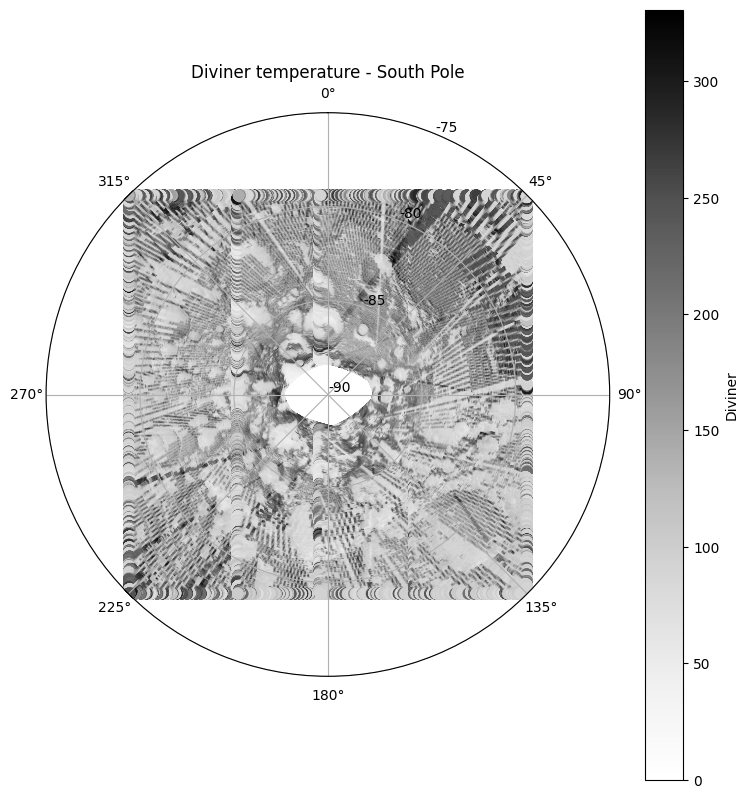

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import dask.dataframe as dd
from dask.distributed import Client

sys.path.append(os.path.abspath('../../data_processing'))

from process_urls_dask import get_file_urls, process_urls_in_parallel
from utils_dask import plot_polar_data

# Set up the Dask client
client = Client(n_workers=4, threads_per_worker=2, memory_limit='4GB')

temp_home = 'https://pds-geosciences.wustl.edu/lro/urn-nasa-pds-lro_diviner_derived1/data_derived_gdr_l3/2016/polar/jp2/'

temp_urls = get_file_urls(temp_home, '.lbl', 'tbol')
print(f"Found {len(temp_urls)} temp files")
temp_urls = temp_urls[-2:]

temp_df = process_urls_in_parallel(client, temp_urls, 'Diviner')
temp_df = temp_df.compute()
print("Files processed successfully")

print(f"Number of NaNs in Temperatures: {np.isnan(temp_df["Diviner"]).sum()} out of {np.prod(temp_df["Diviner"].shape)} ({(np.isnan(temp_df["Diviner"]).sum()/np.prod(temp_df["Diviner"].shape)*100):.2f}%)\n")
print(temp_df.describe())

plot_polar_data(temp_df, 'Diviner', frac=0.6, title_prefix='Diviner temperature')

client.close()